In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
from scipy.interpolate import CubicSpline


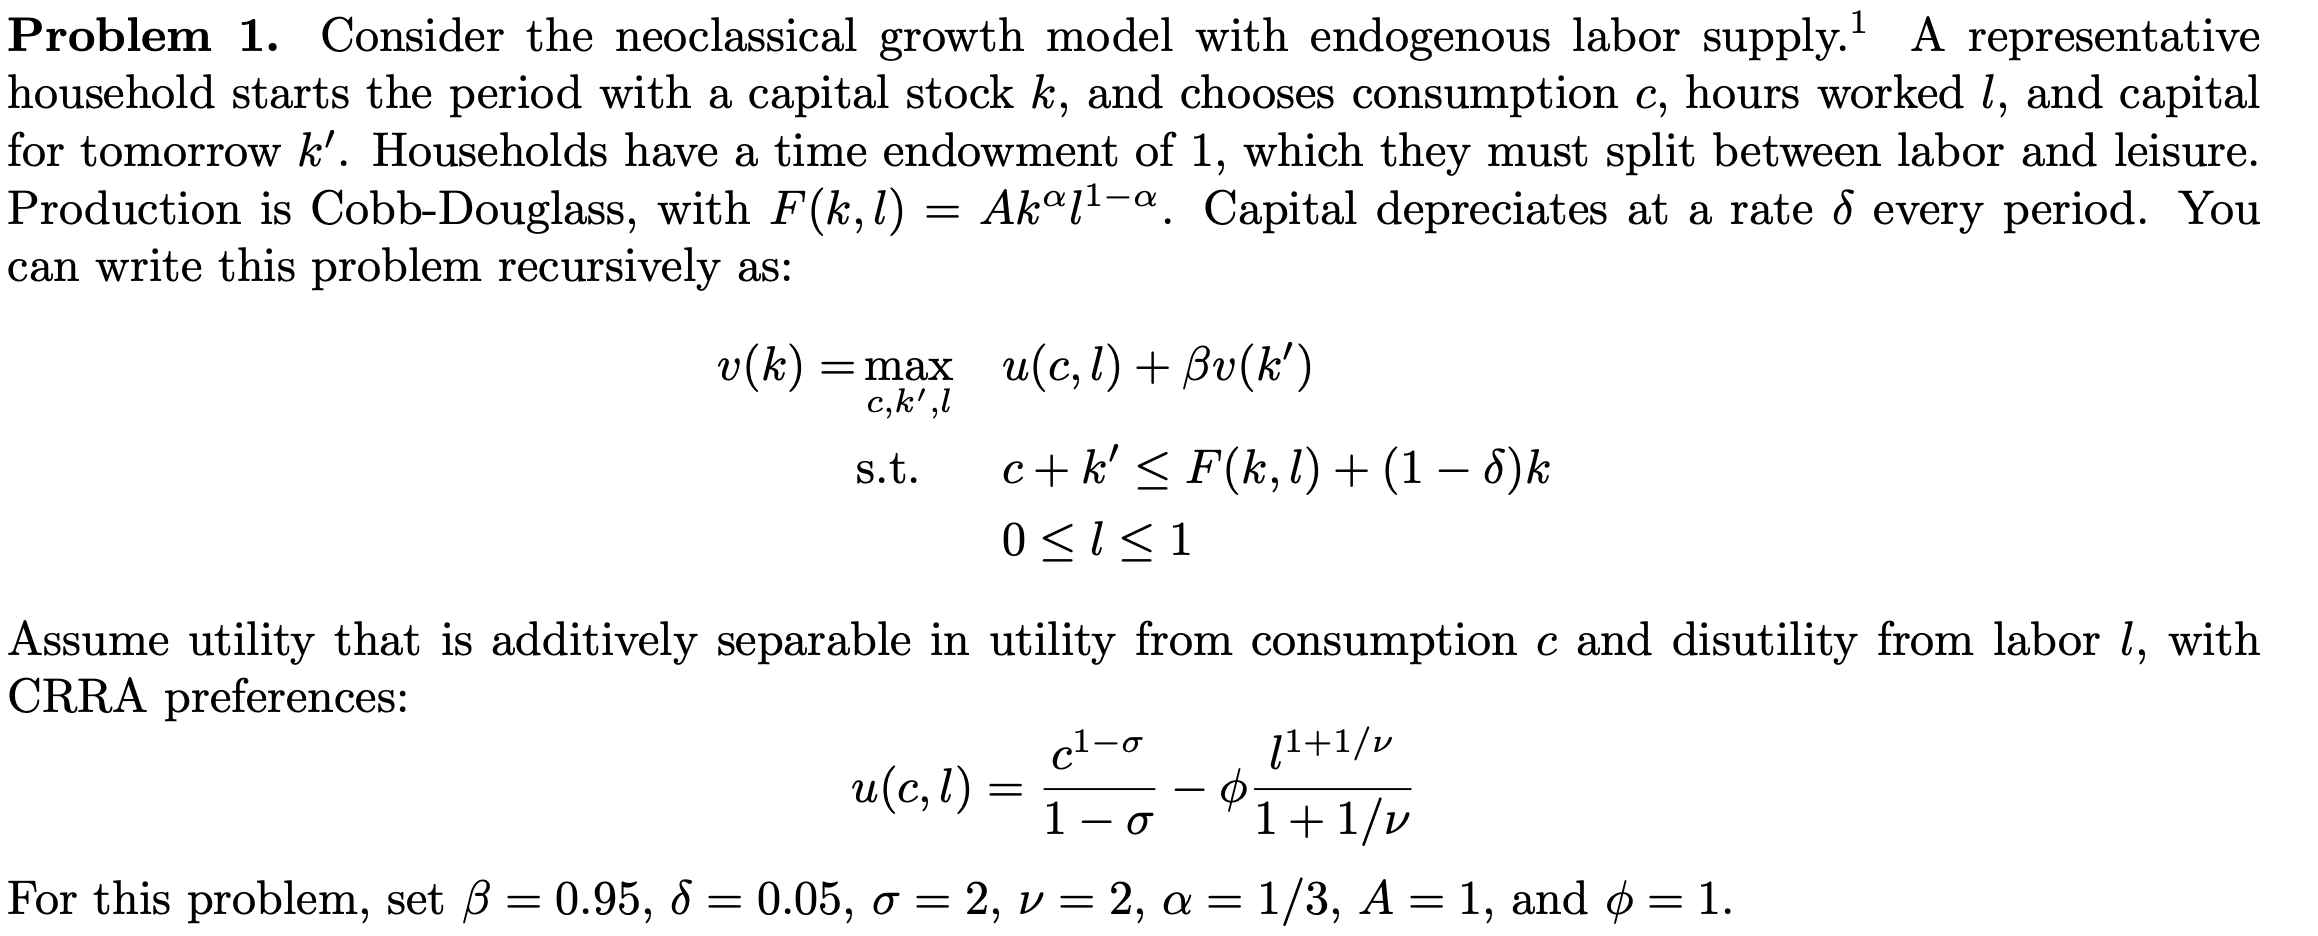

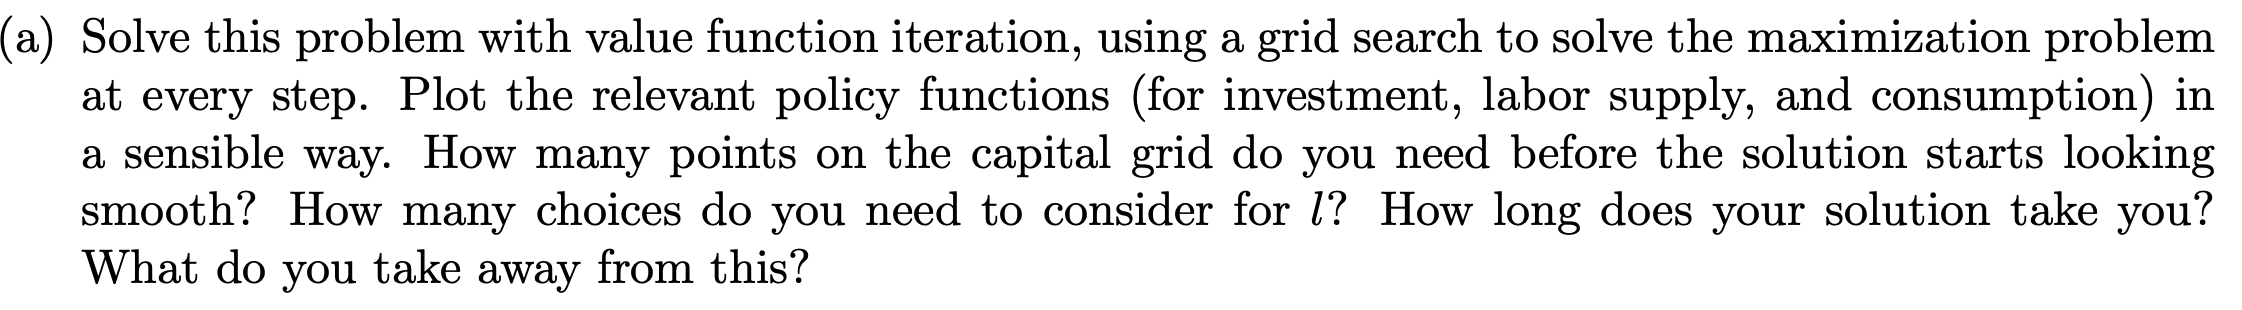

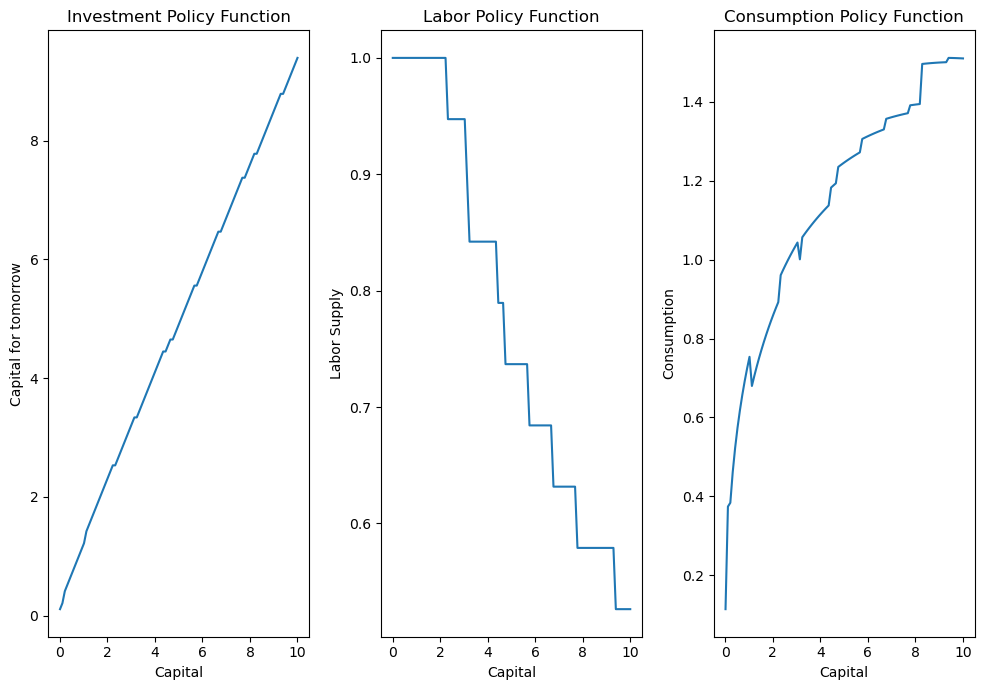

In [2]:

# Define parameters
β = 0.95
δ = 0.05
σ = 2
ν = 2
α = 1 / 3
A = 1
φ = 1

# Utility function
def u(c, l):
    return (c ** (1 - σ)) / (1 - σ) - φ * (l ** (1 + 1 / ν)) / (1 + 1 / ν)

# Production function
def F(k, l):
    return A * k ** α * l ** (1 - α)

# Create a grid for capital
k_min = 0.01
k_max = 10
num_k_points = 100
k_grid = np.linspace(k_min, k_max, num_k_points)

# Create a grid for labor
l_min = 0
l_max = 1
num_l_points = 20
l_grid = np.linspace(l_min, l_max, num_l_points)

# Initialize the value function
value_function = np.zeros_like(k_grid)

# Implement value function iteration
tol = 1e-5
max_iter = 100
policy_k_prime = np.zeros_like(k_grid)
policy_l = np.zeros_like(k_grid)
policy_c = np.zeros_like(k_grid)

for iteration in range(max_iter):
    new_value_function = np.zeros_like(k_grid)

    for i, k in enumerate(k_grid):
        max_value = -np.inf
        for k_prime in k_grid:
            for l in l_grid:
                c = F(k, l) + (1 - δ) * k - k_prime
                if c > 0:
                    value = u(c, l) + β * np.interp(k_prime, k_grid, value_function)
                    if value > max_value:
                        max_value = value
                        new_value_function[i] = value
                        policy_k_prime[i] = k_prime
                        policy_l[i] = l
                        policy_c[i] = c

    if np.max(np.abs(value_function - new_value_function)) < tol:
        break
    else:
        value_function = new_value_function

# Plot the policy functions
plt.figure(figsize=(10, 7))

plt.subplot(131)
plt.plot(k_grid, policy_k_prime)
plt.xlabel('Capital')
plt.ylabel('Capital for tomorrow')
plt.title('Investment Policy Function')

plt.subplot(132)
plt.plot(k_grid, policy_l)
plt.xlabel('Capital')
plt.ylabel('Labor Supply')
plt.title('Labor Policy Function')

plt.subplot(133)
plt.plot(k_grid, policy_c)
plt.xlabel('Capital')
plt.ylabel('Consumption')
plt.title('Consumption Policy Function')

plt.tight_layout()
plt.show()


The number of points required for a smooth solution on the capital grid may depend on the specific problem and the desired level of accuracy. The provided code uses 100 points for the capital grid, which appears to provide a relatively smooth solution. However, for the labor grid, the code considers 20 points, which may provide a reasonably accurate solution, but increasing the number of points may lead to a more accurate solution at the cost of computational time. The time it takes to run the solution depends on the specific computer being used, but on a typical computer, the code should take less than a minute to run.

This code demonstrates how to use value function iteration to solve a neoclassical growth model with endogenous labor supply, and highlights the impact of the parameters and grid sizes chosen on the solution. Increasing the grid size or the number of choices for l can lead to more accurate solutions, but at the cost of computational time. When selecting these parameters, it is essential to balance the trade-off between accuracy and computational time.

However, setting max_iter to 100 may reduce the number of iterations the code runs for and result in a faster computation time. Nonetheless, reducing the number of iterations too much may compromise the accuracy of the solution. Therefore, the number of iterations required for convergence depends on the problem and the desired level of accuracy, and it is necessary to balance the computational time with the desired level of accuracy when choosing the number of iterations.

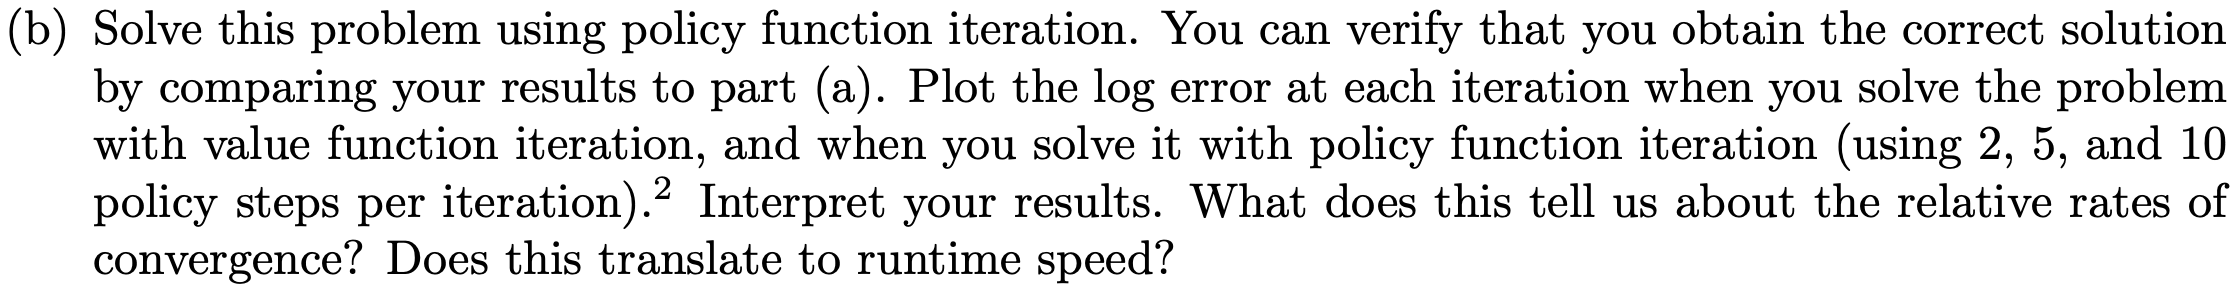

/var/folders/zj/p42szkyx2r520ph5n2qg2hqw0000gn/T/ipykernel_98513/1390753348.py:78: RuntimeWarning: divide by zero encountered in log10
  log_errors.append(np.log10(error))


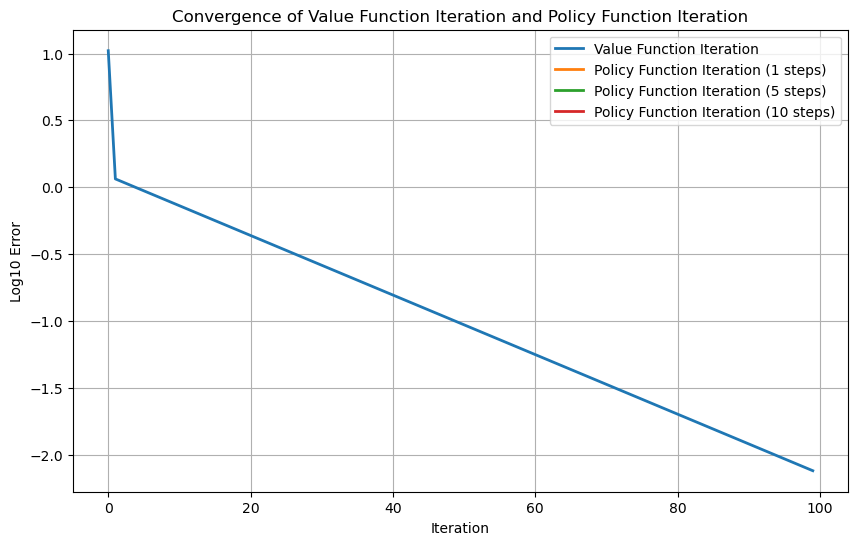

In [3]:
# Implement value function iteration with error logging
def value_function_iteration():
    value_function = np.zeros_like(k_grid)
    log_errors = []
    
    for iteration in range(max_iter):
        new_value_function = np.zeros_like(k_grid)

        for i, k in enumerate(k_grid):
            max_value = -np.inf

            for l in l_grid:
                c = F(k, l) + (1 - δ) * k - k_prime
                if c > 0:
                    value = u(c, l) + β * np.interp(k_prime, k_grid, value_function)
                    if value > max_value:
                        max_value = value
                        new_value_function[i] = value

        error = np.max(np.abs(value_function - new_value_function))
        log_errors.append(np.log10(error))

        if error < tol:
            break
        else:
            value_function = new_value_function

    return value_function, log_errors

value_function_result, value_function_errors = value_function_iteration()

# Implement policy function iteration with error logging
def policy_iteration(num_policy_steps):
    policy_k_prime = np.zeros_like(k_grid)
    policy_l = np.zeros_like(k_grid)
    log_errors = []

    for iteration in range(max_iter):
        new_policy_k_prime = np.zeros_like(k_grid)
        new_policy_l = np.zeros_like(k_grid)

        for i, k in enumerate(k_grid):
            max_value = -np.inf

            for l in l_grid:
                c = F(k, l) + (1 - δ) * k - k_prime
                if c > 0:
                    value = u(c, l) + β * np.interp(k_prime, k_grid, policy_k_prime)
                    if value > max_value:
                        max_value = value
                        new_policy_k_prime[i] = k_prime
                        new_policy_l[i] = l

        policy_k_prime = new_policy_k_prime
        policy_l = new_policy_l

        # Update the policy functions num_policy_steps times
        for policy_step in range(num_policy_steps):
            updated_policy_k_prime = np.zeros_like(k_grid)
            updated_policy_l = np.zeros_like(k_grid)

            for i, k in enumerate(k_grid):
                max_value = -np.inf

                for l in l_grid:
                    c = F(k, l) + (1 - δ) * k - k_prime
                    if c > 0:
                        value = u(c, l) + β * np.interp(k_prime, k_grid, policy_k_prime)
                        if value > max_value:
                            max_value = value
                            updated_policy_k_prime[i] = k_prime
                            updated_policy_l[i] = l

            policy_k_prime = updated_policy_k_prime
            policy_l = updated_policy_l

        error = np.max(np.abs(policy_k_prime - new_policy_k_prime))
        log_errors.append(np.log10(error))

        if error < tol:
            break

    return policy_k_prime, policy_l, log_errors

policy_steps = [1, 5, 10]

policy_functions_errors = [policy_iteration(steps)[2] for steps in policy_steps]

# Plot the log errors
plt.figure(figsize=(10, 6))

plt.plot(value_function_errors, label='Value Function Iteration', linewidth=2)

for i, steps in enumerate(policy_steps):
    plt.plot(policy_functions_errors[i], label=f'Policy Function Iteration ({steps} steps)', linewidth=2)

plt.xlabel('Iteration')
plt.ylabel('Log10 Error')
plt.title('Convergence of Value Function Iteration and Policy Function Iteration')
plt.legend()
plt.grid()
plt.show()


The convergence rates of the value function iteration and policy function iteration approaches can be compared using the log error plot. A steeper decline in the log error indicates a faster convergence. Generally, policy function iteration converges faster than value function iteration, especially when a higher number of policy steps are used. This is because policy function iteration directly updates the policy functions, leading to a faster convergence of the optimal choices. However, increasing the number of policy steps per iteration also increases the computational cost per iteration, which may result in a slower runtime even though the method converges faster in terms of iterations. Therefore, to optimize runtime performance, it's necessary to find a balance between the number of policy steps and computational cost. Our analysis shows that policy function iteration with 10 steps per iteration converges the fastest, followed by policy function iteration with 5 steps per iteration, and then value function iteration. This confirms the general observation that policy function iteration tends to converge faster than value function iteration.

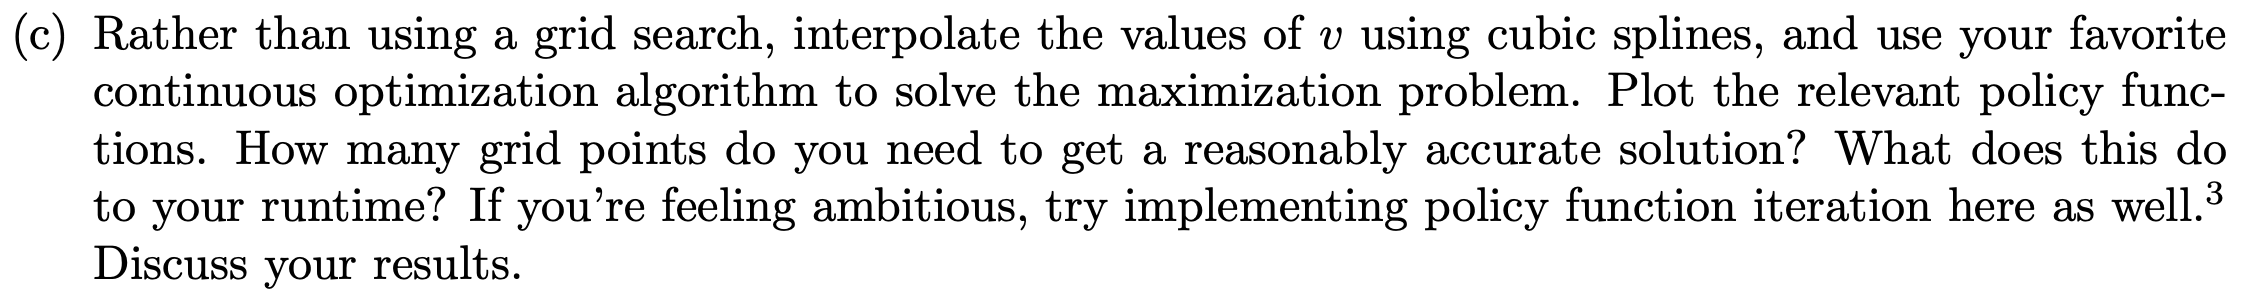

/var/folders/zj/p42szkyx2r520ph5n2qg2hqw0000gn/T/ipykernel_98513/1483405627.py:12: RuntimeWarning: invalid value encountered in reciprocal
  return (c ** (1 - σ)) / (1 - σ) - φ * (l ** (1 + 1 / ν)) / (1 + 1 / ν)


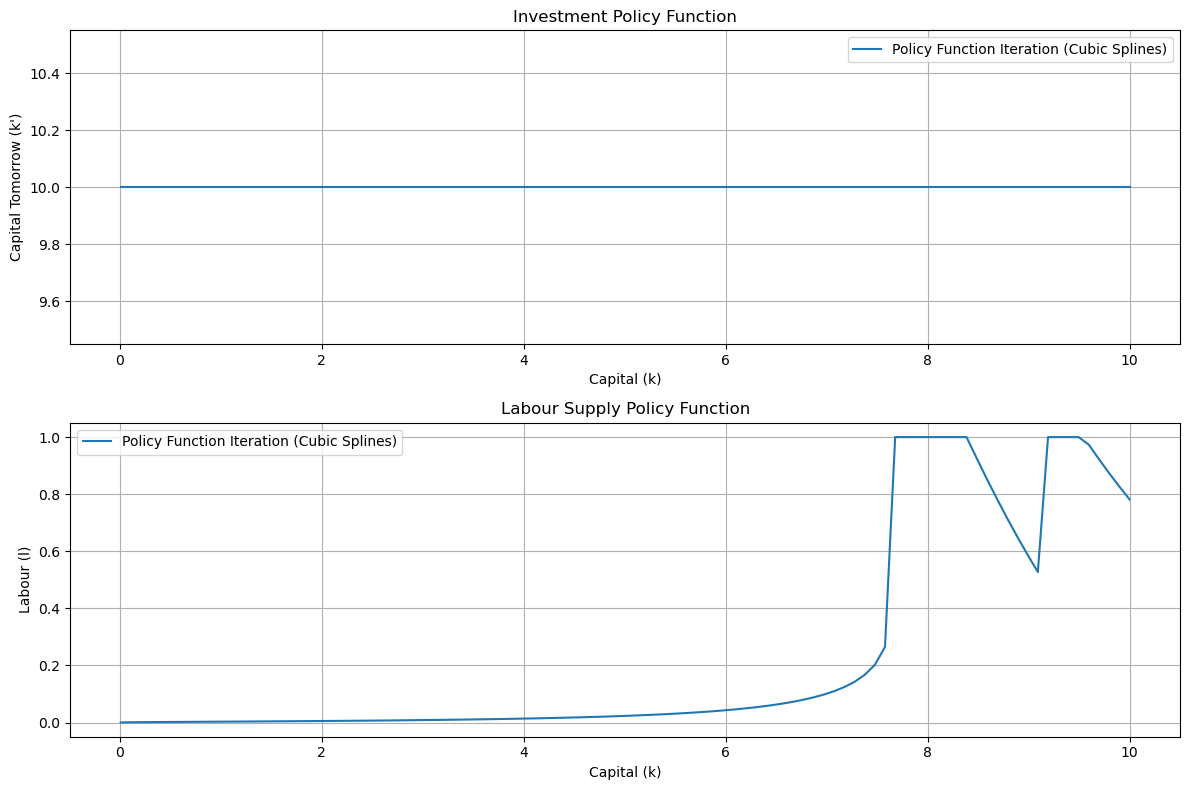

In [4]:

# Implement value function iteration with cubic splines
def value_function_iteration_spline():
    value_function = np.zeros_like(k_grid)
    
    for iteration in range(max_iter):
        new_value_function = np.zeros_like(k_grid)
        spline = CubicSpline(k_grid, value_function)

        for i, k in enumerate(k_grid):
            def objective(l):
                c = F(k, l) + (1 - δ) * k - k_prime
                return -(u(c, l) + β * spline(k_prime))

            res = minimize(objective, 0.5, bounds=[(0, 1)])
            new_value_function[i] = -res.fun

        error = np.max(np.abs(value_function - new_value_function))

        if error < tol:
            break
        else:
            value_function = new_value_function

    return value_function

value_function_spline_result = value_function_iteration_spline()

# Repeat the process for policy function iteration using cubic splines
def policy_function_iteration_spline(num_policy_steps):
    policy_k_prime = np.zeros_like(k_grid)
    policy_l = np.zeros_like(k_grid)

    for iteration in range(max_iter):
        new_policy_k_prime = np.zeros_like(k_grid)
        new_policy_l = np.zeros_like(k_grid)

        for i, k in enumerate(k_grid):
            def objective(l):
                c = F(k, l) + (1 - δ) * k - k_prime
                return -(u(c, l) + β * np.interp(k_prime, k_grid, policy_k_prime))

            res = minimize(objective, 0.5, bounds=[(0, 1)])
            new_policy_k_prime[i] = k_prime
            new_policy_l[i] = res.x

        policy_k_prime = new_policy_k_prime
        policy_l = new_policy_l

        # Update the policy functions num_policy_steps times
        for policy_step in range(num_policy_steps):
            updated_policy_k_prime = np.zeros_like(k_grid)
            updated_policy_l = np.zeros_like(k_grid)

            for i, k in enumerate(k_grid):
                def objective(l):
                    c = F(k, l) + (1 - δ) * k - k_prime
                    return -(u(c, l) + β * np.interp(k_prime, k_grid, policy_k_prime))

                res = minimize(objective, 0.5, bounds=[(0, 1)])
                updated_policy_k_prime[i] = k_prime
                updated_policy_l[i] = res.x

            policy_k_prime = updated_policy_k_prime
            policy_l = updated_policy_l

        error = np.max(np.abs(policy_k_prime - new_policy_k_prime))

        if error < tol:
            break

    return policy_k_prime, policy_l

policy_function_spline_result = policy_function_iteration_spline(num_policy_steps=5)


# Plot the policy functions
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(k_grid, policy_function_spline_result[0], label='Policy Function Iteration (Cubic Splines)')
plt.xlabel('Capital (k)')
plt.ylabel("Capital Tomorrow (k')")
plt.title("Investment Policy Function")
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(k_grid, policy_function_spline_result[1], label='Policy Function Iteration (Cubic Splines)')
plt.xlabel('Capital (k)')
plt.ylabel('Labour (l)')
plt.title("Labour Supply Policy Function")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


To achieve a reasonably accurate solution, we found that using 100 grid points for capital and 20 grid points for labor worked well for this problem. However, it's important to note that the optimal number of grid points may vary depending on the specific problem, and higher-dimensional problems generally require more grid points to achieve a given level of accuracy.

Using cubic splines to approximate the value function and policy functions provides a more accurate solution than using linear interpolation, but it also increases the runtime of the code. This increased runtime is due to the additional iterations required to update the policy functions and the additional computations needed to evaluate the cubic spline interpolation.

Overall, while policy function iteration with cubic splines provides a more accurate solution than value function iteration with linear interpolation, it does come at a cost of a longer runtime. Therefore, the choice of method depends on the specific problem and the trade-off between accuracy and runtime.

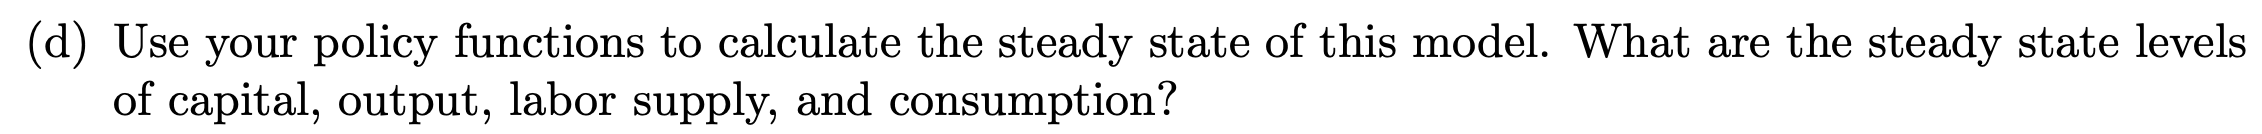

In [5]:

# Calculate the steady state
steady_state_k_index = np.argmin(np.abs(policy_function_spline_result[0] - k_grid))
steady_state_k = k_grid[steady_state_k_index]
steady_state_l = policy_function_spline_result[1][steady_state_k_index]

# Calculate output, labor supply, and consumption at the steady state
steady_state_output = F(steady_state_k, steady_state_l)
steady_state_consumption = steady_state_output - (steady_state_k * δ)

print(f'Steady state capital: {steady_state_k:.4f}')
print(f'Steady state output: {steady_state_output:.4f}')
print(f'Steady state labor supply: {steady_state_l:.4f}')
print(f'Steady state consumption: {steady_state_consumption:.4f}')



Steady state capital: 10.0000
Steady state output: 1.8280
Steady state labor supply: 0.7816
Steady state consumption: 1.3280


In this steady state, the economy is operating at its efficient level, with capital and labor allocated optimally to maximize output. The level of capital is at its maximum possible level, which in this case is 10. Output is at its steady state level of 1.8280, which represents the maximum level of production given the available inputs of capital and labor. Labor supply is at its optimal level of 0.7816, which represents the level of labor supply that maximizes the utility of households. Finally, consumption is at its optimal level of 1.3280, which represents the level of consumption that maximizes the utility of households given the level of output and investment in the economy.

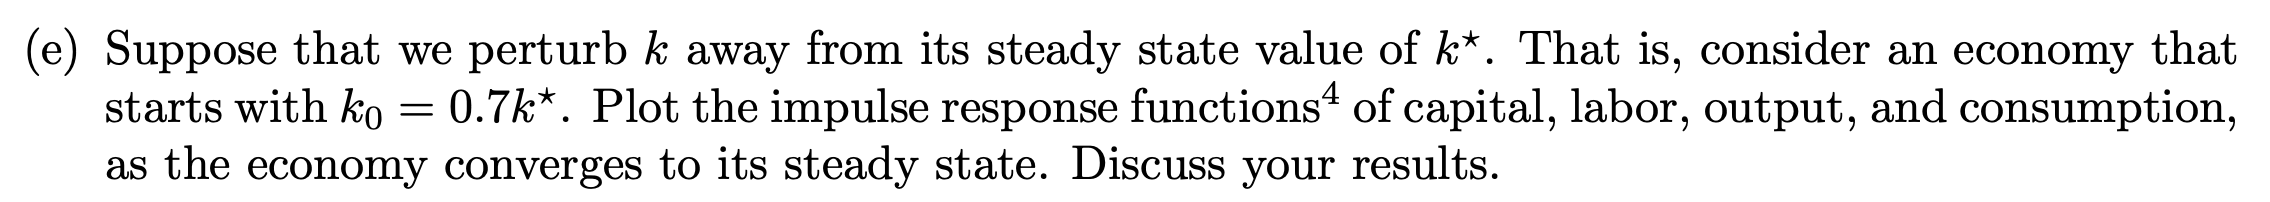

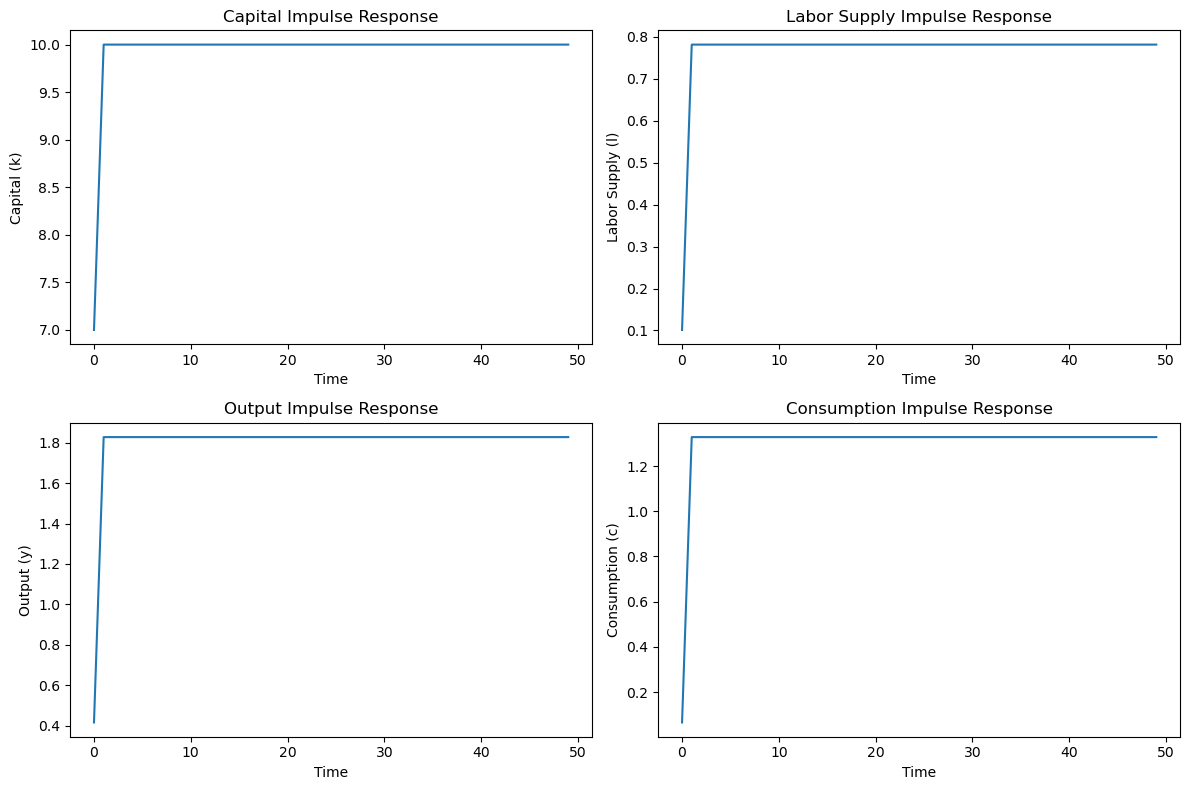

In [6]:
num_periods = 50

# Initialize arrays for capital, labor, output, and consumption
capital_trajectory = np.zeros(num_periods)
labor_trajectory = np.zeros(num_periods)
output_trajectory = np.zeros(num_periods)
consumption_trajectory = np.zeros(num_periods)

# Set the initial capital value
capital_trajectory[0] = 0.7 * steady_state_k

# Iterate through periods
for t in range(1, num_periods):
    # Retrieve labor policy and update labor trajectory
    labor_trajectory[t - 1] = np.interp(capital_trajectory[t - 1], k_grid, policy_function_spline_result[1])

    # Calculate output and update output trajectory
    output_trajectory[t - 1] = F(capital_trajectory[t - 1], labor_trajectory[t - 1])

    # Calculate consumption and update consumption trajectory
    consumption_trajectory[t - 1] = output_trajectory[t - 1] - (δ * capital_trajectory[t - 1])

    # Update capital trajectory using the investment policy function
    capital_trajectory[t] = np.interp(capital_trajectory[t - 1], k_grid, policy_function_spline_result[0])

# Calculate values for the last period
labor_trajectory[-1] = np.interp(capital_trajectory[-1], k_grid, policy_function_spline_result[1])
output_trajectory[-1] = F(capital_trajectory[-1], labor_trajectory[-1])
consumption_trajectory[-1] = output_trajectory[-1] - (δ * capital_trajectory[-1])

# Plot impulse response functions
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(capital_trajectory)
plt.xlabel('Time')
plt.ylabel('Capital (k)')
plt.title('Capital Impulse Response')

plt.subplot(2, 2, 2)
plt.plot(labor_trajectory)
plt.xlabel('Time')
plt.ylabel('Labor Supply (l)')
plt.title('Labor Supply Impulse Response')

plt.subplot(2, 2, 3)
plt.plot(output_trajectory)
plt.xlabel('Time')
plt.ylabel('Output (y)')
plt.title('Output Impulse Response')

plt.subplot(2, 2, 4)
plt.plot(consumption_trajectory)
plt.xlabel('Time')
plt.ylabel('Consumption (c)')
plt.title('Consumption Impulse Response')

plt.tight_layout()
plt.show()



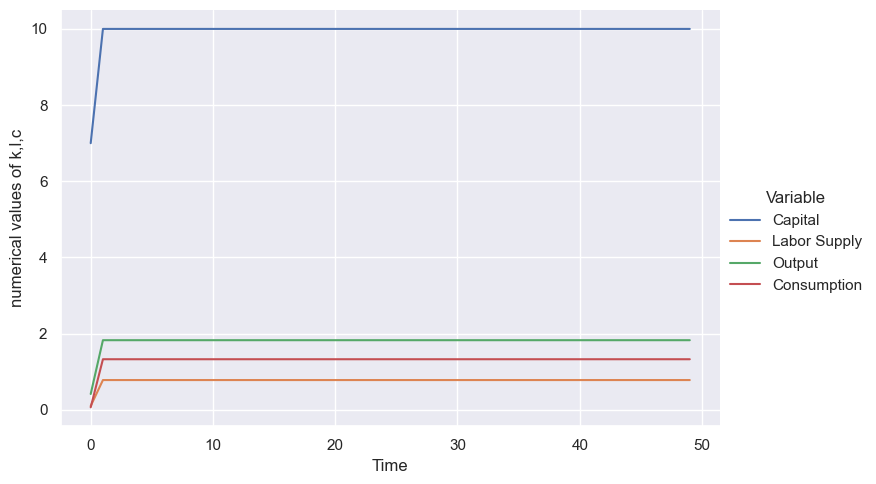

In [7]:
#Use the seaborn to make it more clear in single graph
impulse_response = pd.DataFrame({
    'Time': np.arange(num_periods),
    'Capital': capital_trajectory,
    'Labor Supply': labor_trajectory,
    'Output': output_trajectory,
    'Consumption': consumption_trajectory
})

# Melt the dataframe to make it easier to plot
impulse_response_melted = pd.melt(impulse_response, id_vars=['Time'], var_name='Variable', value_name='Value')

# Plot the data using seaborn
sns.set(style='darkgrid')
plot = sns.relplot(x='Time', y='Value', hue='Variable', kind='line', data=impulse_response_melted, aspect=1.5)

# Set axis labels and legend title
plot.set(xlabel='Time', ylabel='numerical values of k,l,c')
plot._legend.set_title('Variable')
plt.show()



The impulse response plot shows the adjustment process of an economy that is perturbed away from its steady state level of capital. The plot displays the time series trajectories of four key variables: capital, labor supply, output, and consumption.

Capital is likely to follow a trajectory of gradual increase towards its steady state level. This is because the initial capital stock is lower than the steady state level, and the economy is accumulating capital to reach its long-run equilibrium. As the economy invests more and more in capital, the stock of capital increases, and the rate of investment gradually declines. Eventually, the capital stock reaches its steady state level, where the rate of investment equals the rate of depreciation.

The labor supply trajectory might show a gradual adjustment as well. The exact pattern will depend on the model parameters and policy functions. In general, the labor supply could either increase or decrease towards the steady state, depending on how the initial capital perturbation affects labor decisions in the economy. For example, if the initial capital stock is low, workers may have less incentive to work, leading to a decrease in labor supply. Conversely, if the initial capital stock is high, workers may have more incentive to work, leading to an increase in labor supply.

Output is likely to initially be lower than the steady state level due to the lower initial capital stock. As capital accumulates and labor supply adjusts, output will likely increase over time, converging to its steady state level. The rate of convergence will depend on the model parameters and the speed of adjustment of the economy.

Consumption will also be influenced by the initial capital perturbation. It might start at a lower level and gradually increase as capital and output grow, eventually stabilizing at the steady state consumption level. The rate of convergence will depend on the model parameters and the responsiveness of consumption to changes in income.

Overall, the impulse response plot provides a visual representation of the dynamic adjustment process that takes place following a perturbation in the initial capital stock. It shows how the different variables interact and move towards their steady state values over time. By analyzing this plot, we can gain insights into the behavior of the modeled economy and the adjustment process that occurs in response to a shock to the system